Login to lxplus:

- ssh -L 8081:localhost:8081 zhangr@lxplus711.cern.ch

Then on lxplus:

- export PATH=/afs/cern.ch/work/c/chlcheng/public/local/conda/miniconda/envs/ml-base/bin:$PATH

- jupyter notebook --no-browser --port 8081

In [1]:
import ROOT
from quickstats.components import AnalysisObject, ExtendedModel, ExtendedMinimizer
%matplotlib inline

Welcome to JupyROOT 6.24/06

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [2]:
filepath1 = "/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/SM/rescaled/nonres/bbyy/0_ranking_mu0.031.root"
filepath2 = "/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/SM/rescaled/nonres/bbyy/0_ranking.root"
file_1 = ''
file_2 = ''
model1 = ExtendedModel(filepath1+file_1, data_name="asimovData_1_NP_Nominal")
model2 = ExtendedModel(filepath2+file_2, data_name="asimovData_1_NP_Nominal")

INFO: Opening file "/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/SM/rescaled/nonres/bbyy/0_ranking_mu0.031.root"
INFO: Loaded workspace "combWS"
INFO: Loaded model config "ModelConfig"
INFO: Loaded model pdf "CombinedPdf" from model config
INFO: Loaded dataset "asimovData_1_NP_Nominal" from workspace
INFO: Loaded nuisance parameters from model config
INFO: Loaded global observables from model config
INFO: Loaded parameters of interest from model config
INFO: Loaded observables from model config
INFO: Opening file "/afs/cern.ch/work/z/zhangr/HHcomb/hh_combination_fw/hh_combination_fw/outputs_newCDI/SM/rescaled/nonres/bbyy/0_ranking.root"
INFO: Loaded workspace "combWS"
INFO: Loaded model config "ModelConfig"
INFO: Loaded model pdf "CombinedPdf" from model config
INFO: Loaded dataset "asimovData_1_NP_Nominal" from workspace
INFO: Loaded nuisance parameters from model config
INFO: Loaded global observables from model config
INFO: Loaded parameters o

In [3]:
# model1.print_summary()
# model2.print_summary()
model1.get_categories(), model2.get_categories()

(['SM_1', 'SM_2', 'BSM_1', 'BSM_2'], ['SM_1', 'SM_2', 'BSM_1', 'BSM_2'])

In [7]:
# !quickstats generate_standard_asimov -i {filename} -o test.root --poi xsec_br --poi_scale 0.032776 --asimov_types 2,5

In [8]:
# model = ExtendedModel("test.root")
# model.print_summary()

In [9]:
# model.pair_constraints(to_str=True)

<Figure size 432x288 with 0 Axes>

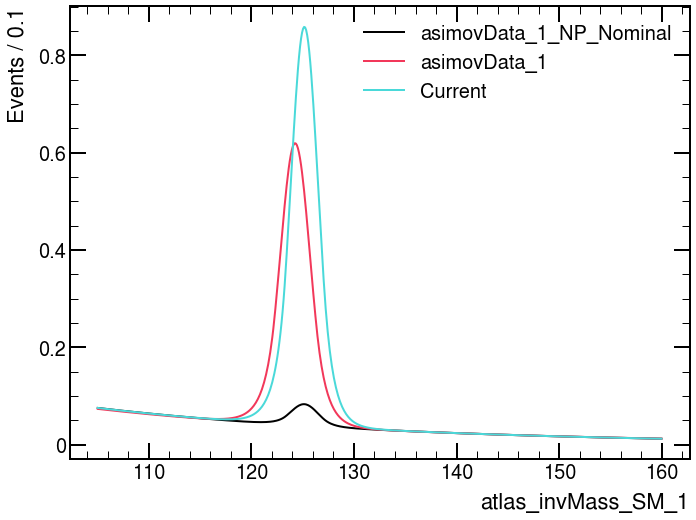

In [6]:
plt1 = model1.plot_distributions(categories=['SM_1'],
                               current_distributions=True,
                               datasets=["asimovData_1_NP_Nominal", "asimovData_1"
                                        ])
plt1

<Figure size 432x288 with 0 Axes>

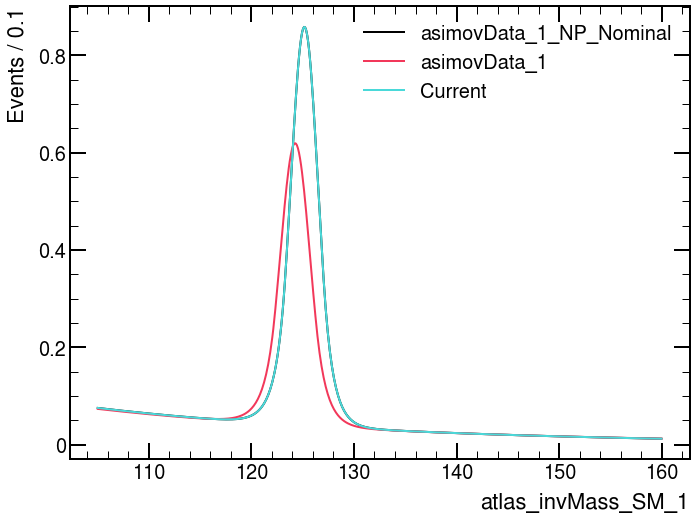

In [7]:
plt2 = model2.plot_distributions(categories=['SM_1'],
                               current_distributions=True,
                               datasets=["asimovData_1_NP_Nominal", "asimovData_1"
                                        ])
plt2

In [ ]:
from quickstats.components import ExtendedModel
model1 = ExtendedModel("/afs/cern.ch/user/z/zhangr/work/HH4b/hh4b-vbf-limits/RooWorkspaceIza_lowth/125.root", data_name="obsData")
model2 = ExtendedModel("/afs/cern.ch/user/z/zhangr/work/HH4b/hh4b-vbf-limits/RooWorkspaceTREx_nobb_unblind2_larglumi_SeparateGammas_bkgnodata/RooStats/HH4b_K1p0_C18_Vm_hh_Q45_nocor_NC_combined_HH4b_K1p0_C18_Vm_hh_Q45_nocor_NC_model_forLimits.root", data_name="obsData")
sumpdf1 = model1.workspace.pdf("Region_distmHH_L0_Y2016_T4_J4_BMin0_DSRlowdEtainXhh_model")
sumpdf2 = model2.workspace.pdf("SMNR_R16_4b_dEta_1_Xhh_1__m_hh_model")

sumpdf1.printComponentTree()

sumpdf2.printComponentTree()

In [126]:
model.workspace.saveSnapshot("nominalAllVars", model.workspace.allVars())
model.generate_asimov(poi_name="xsec_br", poi_val=0.032776, poi_profile=0.032776, asimov_name="Asimov_profile_S_plus_B")
model.generate_asimov(poi_name="xsec_br", poi_val=0.032776, poi_profile=None, asimov_name="Asimov_1")


INFO: Created ExtendedMinimizer("Minimizer") instance


In [127]:
model.fix_parameters("ATLAS_*=0,THEO_*=0,alpha_*=0,SPURIOUS_*=0")
# model.generate_asimov(poi_name="xsec_br", poi_val=0, poi_profile=0, asimov_name="Asimov_profile_B_only")
model.generate_asimov(poi_name="xsec_br", poi_val=0.032776, poi_profile=0.032776, asimov_name="Asimov_partial_profile_S_plus_B")
# model.generate_asimov(poi_name="xsec_br", poi_val=0, asimov_name="Asimov_no_profile_B_only")
# model.generate_asimov(poi_name="xsec_br", poi_val=1, asimov_name="Asimov_no_profile_S_plus_B")

INFO: Fixed parameter "ATLAS_LHCmass" at value 0.0
INFO: Fixed parameter "ATLAS_EG_SCALE_ALL" at value 0.0
INFO: Fixed parameter "ATLAS_EG_RESOLUTION_ALL" at value 0.0
INFO: Fixed parameter "ATLAS_JET_JER_EffectiveNP_11" at value 0.0
INFO: Fixed parameter "ATLAS_PRW_DATASF" at value 0.0
INFO: Fixed parameter "ATLAS_JET_JER_EffectiveNP_10" at value 0.0
INFO: Fixed parameter "ATLAS_JET_Pileup_PtTerm" at value 0.0
INFO: Fixed parameter "ATLAS_JET_EffectiveNP_Statistical2" at value 0.0
INFO: Fixed parameter "ATLAS_PH_EFF_TRIGGER_Uncertainty" at value 0.0
INFO: Fixed parameter "ATLAS_PH_EFF_ISO_Uncertainty" at value 0.0
INFO: Fixed parameter "ATLAS_JET_EtaIntercalibration_NonClosure_2018data" at value 0.0
INFO: Fixed parameter "ATLAS_JET_Pileup_RhoTopology" at value 0.0
INFO: Fixed parameter "ATLAS_JET_JER_EffectiveNP_8" at value 0.0
INFO: Fixed parameter "ATLAS_JET_Flavor_Composition" at value 0.0
INFO: Fixed parameter "ATLAS_JET_Pileup_OffsetMu" at value 0.0
INFO: Fixed parameter "ATLAS_J

In [128]:
model.print_summary()

workspace: combWS 

POIs: xsec_br 

datasets: combData, combDatabinned, asimovData_0, asimovData_1, Asimov_profile_S_plus_B, Asimov_partial_profile_S_plus_B, Asimov_1 

observables: atlas_invMass_SM_1, atlas_invMass_SM_2, atlas_invMass_BSM_1, atlas_invMass_BSM_2, channellist 



In [129]:
model.get_categories()

['SM_1', 'SM_2', 'BSM_1', 'BSM_2']

<Figure size 432x288 with 0 Axes>

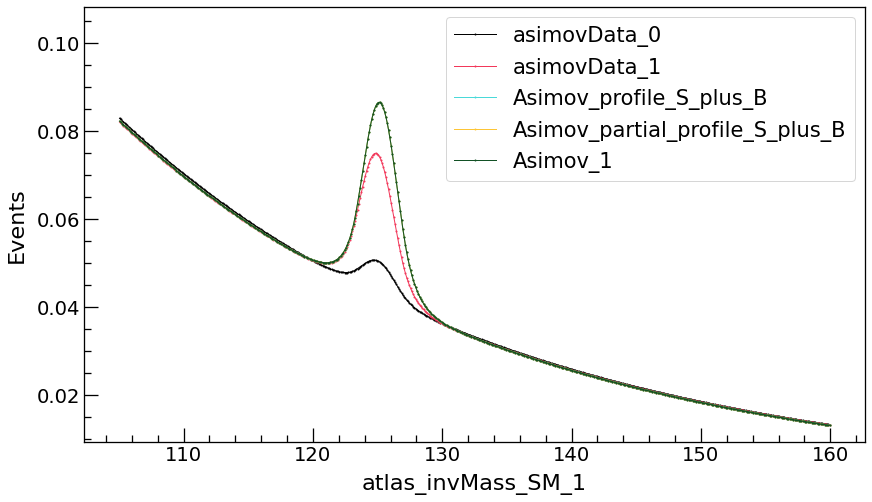

In [130]:
plt = model.plot_distributions(category='SM_1',
                               current_distributions=False,
                               datasets=[#"combData",
                                         "asimovData_0",
#                                          "dataset_temp",
                                        "asimovData_1",
                               "Asimov_profile_S_plus_B",
                               "Asimov_partial_profile_S_plus_B",
                               "Asimov_1"])
                                 #snapshots=["nominalAllVars"])
plt.show()

In [70]:
filename2 = "/eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/batches/v140invfb_20210903_CI/output_mu_unblind/rescaled/nonres/bbtautau/asimov_temp-2.root"
model2 = ExtendedModel(filename2)
model2.print_summary()

INFO: Opening file "/eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces/batches/v140invfb_20210903_CI/output_mu_unblind/rescaled/nonres/bbtautau/asimov_temp-2.root"
INFO: Loaded workspace "combWS"
INFO: Loaded model config "ModelConfig"
INFO: Activating binned likelihood evaluation
INFO: Activated binned likelihood attribute for Region_BMin0_incJet1_Y2015_DZllbbCR_T2_L2_distmLL_J2_model
INFO: Activated binned likelihood attribute for Region_BMin0_incJet1_distNN_J2_DSM_T2_SpcTauLH_Y2015_LTT0_L1_model
INFO: Activated binned likelihood attribute for Region_BMin0_incJet1_distNN_J2_DSM_T2_SpcTauLH_Y2015_LTT1_L1_model
INFO: Activated binned likelihood attribute for Region_BMin0_incJet1_distSMBDT_J2_Y2015_DLLOS_T2_SpcTauHH_L0_model
INFO: Loaded model pdf "simPdf" from model config
INFO: Loaded dataset "combData" from workspace
INFO: Loaded nuisance parameters from model config
INFO: Loaded global observables from model config
INFO: Loaded parameters of interest from

In [71]:
model2.get_categories()


['Region_BMin0_incJet1_distNN_J2_DSM_T2_SpcTauLH_Y2015_LTT0_L1',
 'Region_BMin0_incJet1_distSMBDT_J2_Y2015_DLLOS_T2_SpcTauHH_L0',
 'Region_BMin0_incJet1_Y2015_DZllbbCR_T2_L2_distmLL_J2',
 'Region_BMin0_incJet1_distNN_J2_DSM_T2_SpcTauLH_Y2015_LTT1_L1']

<Figure size 432x288 with 0 Axes>

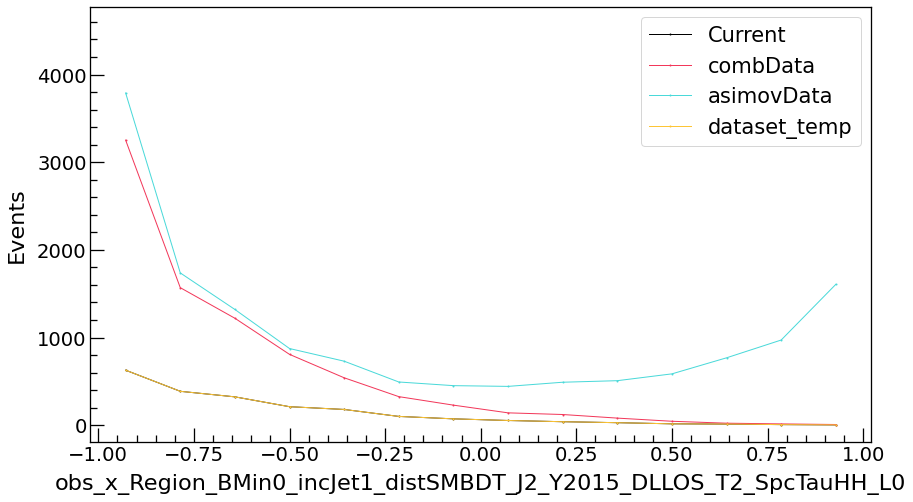

[#1] INFO:NumericIntegration -- RooRealIntegral::init(Region_BMin0_incJet1_distNN_J2_DSM_T2_SpcTauLH_Y2015_LTT0_L1_model_Int[obs_x_Region_BMin0_incJet1_distNN_J2_DSM_T2_SpcTauLH_Y2015_LTT0_L1]) using numeric integrator RooBinIntegrator to calculate Int(obs_x_Region_BMin0_incJet1_distNN_J2_DSM_T2_SpcTauLH_Y2015_LTT0_L1)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Region_BMin0_incJet1_distSMBDT_J2_Y2015_DLLOS_T2_SpcTauHH_L0_model_Int[obs_x_Region_BMin0_incJet1_distSMBDT_J2_Y2015_DLLOS_T2_SpcTauHH_L0]) using numeric integrator RooBinIntegrator to calculate Int(obs_x_Region_BMin0_incJet1_distSMBDT_J2_Y2015_DLLOS_T2_SpcTauHH_L0)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Region_BMin0_incJet1_Y2015_DZllbbCR_T2_L2_distmLL_J2_model_Int[obs_x_Region_BMin0_incJet1_Y2015_DZllbbCR_T2_L2_distmLL_J2]) using numeric integrator RooBinIntegrator to calculate Int(obs_x_Region_BMin0_incJet1_Y2015_DZllbbCR_T2_L2_distmLL_J2)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(Region_

In [72]:
plt2 = model2.plot_distributions(category='Region_BMin0_incJet1_distSMBDT_J2_Y2015_DLLOS_T2_SpcTauHH_L0',
                               current_distributions=True,
                               datasets=["combData", 
                                         "asimovData",
                                         "dataset_temp"])
                                 #snapshots=["nominalAllVars"])
plt2.show()

<Figure size 432x288 with 0 Axes>

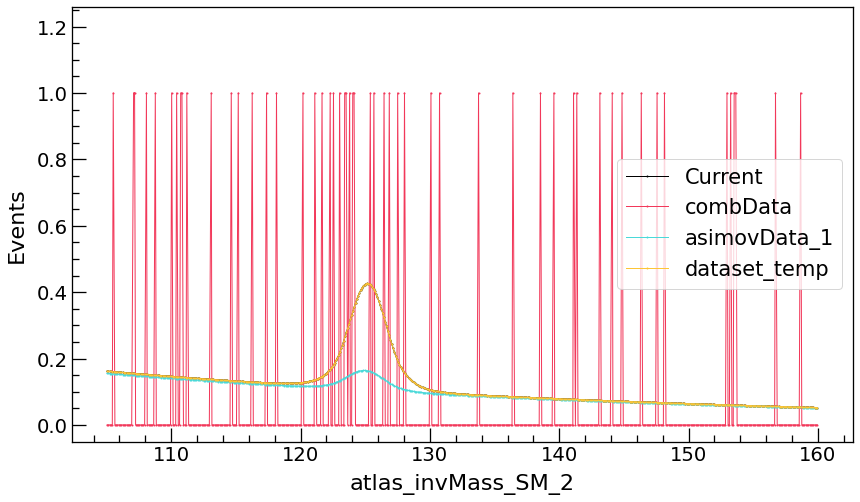

In [13]:
plt = model.plot_distributions(category='SM_2',
                               current_distributions=True,
                               datasets=["combData",
                                         "asimovData_1",
                                         "dataset_temp",])
                                 #snapshots=["nominalAllVars"])
plt.show()

<Figure size 432x288 with 0 Axes>

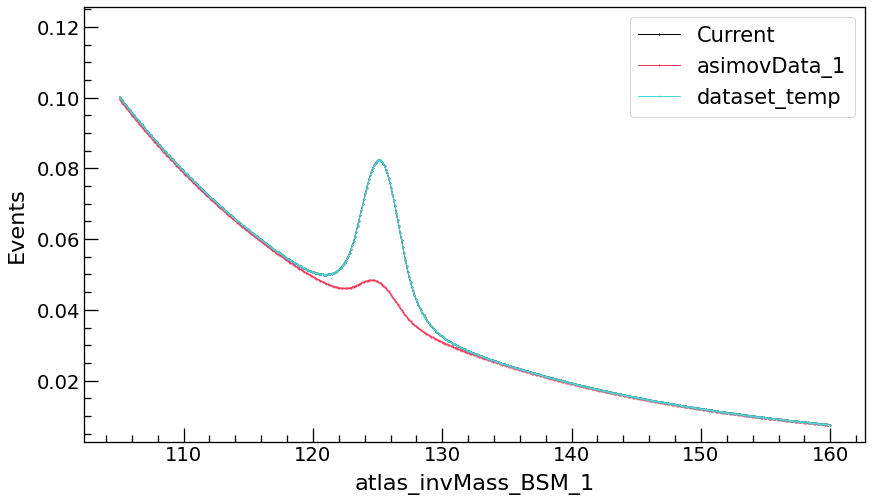

In [15]:
plt = model.plot_distributions(category='BSM_1',
                               current_distributions=True,
                               datasets=[#"combData",
                                         "asimovData_1",
                                         "dataset_temp",])
                                 #snapshots=["nominalAllVars"])
plt.show()

<Figure size 432x288 with 0 Axes>

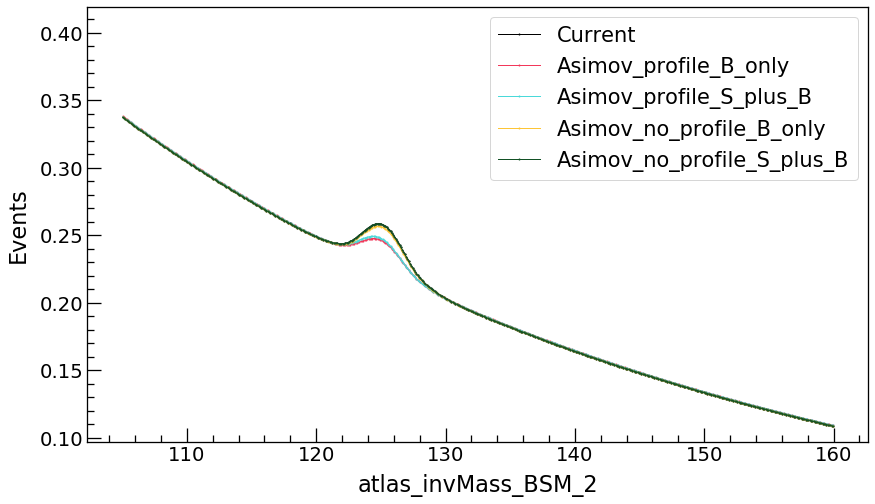

In [17]:
plt = model.plot_distributions(category='BSM_2',
                               current_distributions=True,
                               datasets=["Asimov_profile_B_only", 
                                         "Asimov_profile_S_plus_B",
                                         "Asimov_no_profile_B_only",
                                         "Asimov_no_profile_S_plus_B"])
                                 #snapshots=["nominalAllVars"])
plt.show()